# Conditional Generative Adversarial Network

Conditional Generative Adversarial Nets - [Paper](https://arxiv.org/pdf/1411.1784.pdf)

Conditional GANs are constructed by feeding the data we wish to condition on to both the generator and discriminator.

$\min\limits_G\max\limits_D V(D,G) = \mathbb{E}_{x\sim p_{data}(x)} [log D(x|y)] + \mathbb{E}_{z\sim p_z(z)} [log(1 - D(G(z|y)))]$

### Wasserstein Loss + Gradient Penalty + Diversity Score

* Wasserstein loss for discriminator and generator models
* Linear activation in discriminator output instead of sigmoid
* Clip discriminator weights after each update
* Label smoothing for real outputs
* RMSprop instead of Adam
* Gradient penalty
* Diversity score
    
Note: The following implementation is for continuous variables. For discrete variables, implement an embedding layer.

<img align="center" src="https://user-images.githubusercontent.com/27071473/84100915-6b6a1f80-aa3f-11ea-976b-a2b53e449205.png" width=40%>

Ref: https://colab.research.google.com/github/timsainb/tensorflow2-generative-models/blob/master/3.0-WGAN-GP-fashion-mnist.ipynb#scrollTo=Wyipg-4oSYb1

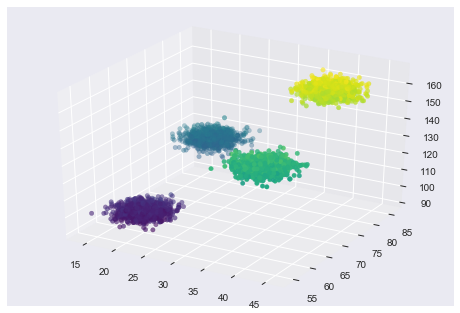

In [2]:
from data.synthetic import get_normal_data, plot_data

X, y = get_normal_data(1000)
plot_data(X, y)

In [9]:
from model.cgan import CGAN
from hyperopt.hyperopt import hyperopt
from hyperopt.hyperopt import hyperopt_log, hyperparam_plot, performance_plot

params = {
    "x_features": 2,
    "y_features": 1,
    "epochs": 10000,
}
opt_params = {
    'latent_dim': [1,100],
    'g_hidden': [1,100],
    'd_hidden': [1,100],
    'label_smooth': [0.0,1.0],
    'd_dropout': [0.0, 1.0],
    'gp_weight': [0.0, 1.0],
    'ds_weight': [0.0, 1.0],
}

cgan, best_params, best_vals, experiment, exp_model = hyperopt(
    CGAN,
    params,
    opt_params,
    X, y,
    trials=30)

[INFO 07-10 16:37:42] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 7 trials, GPEI for subsequent trials]). Iterations after 7 will take longer to generate due to  model-fitting.
[INFO 07-10 16:37:42] ax.service.managed_loop: Started full optimization with 30 steps.
[INFO 07-10 16:37:42] ax.service.managed_loop: Running optimization trial 1...
[INFO 07-10 16:44:09] ax.service.managed_loop: Running optimization trial 2...
[INFO 07-10 16:49:55] ax.service.managed_loop: Running optimization trial 3...


KeyboardInterrupt: 

In [ ]:
y_hat = cgan.predict(X)
plot_data(X, y_hat)

In [ ]:
print(f"latent_dim: {cgan.latent_dim}")
print(f"g_hidden: {cgan.g_hidden}")
print(f"d_hidden: {cgan.d_hidden}")
print(f"label_smooth: {cgan.label_smooth}")
print(f"d_dropout: {cgan.d_dropout}")
print(f"gp_weight: {cgan.gp_weight}")
print(f"ds_weight: {cgan.ds_weight}")

display(hyperopt_log(experiment))
hyperparam_plot(exp_model, "g_hidden", "d_hidden")
hyperparam_plot(exp_model, "gp_weight", "ds_weight")
performance_plot(experiment, best_vals)

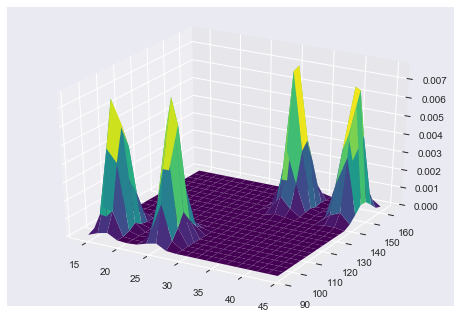

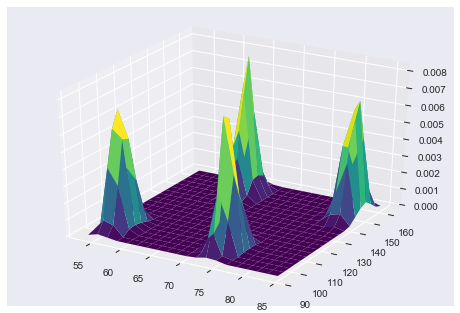

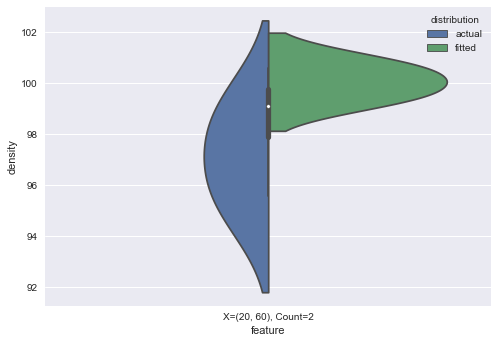

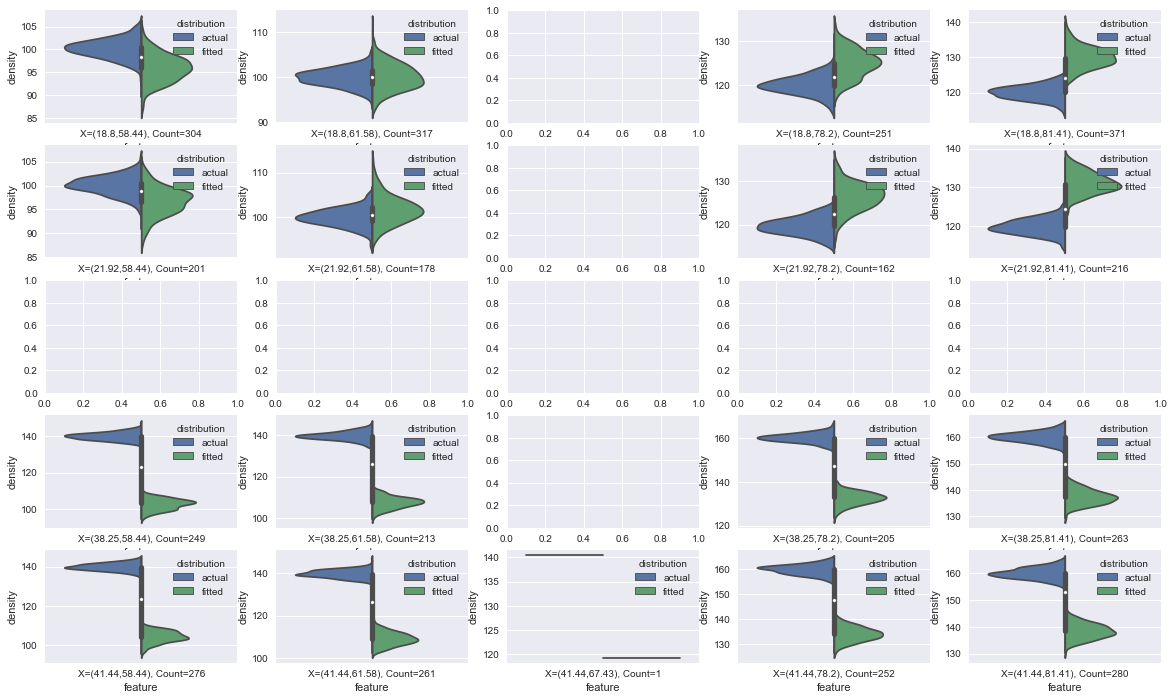

In [14]:
from visualisation.visualisation import Visualisation

viz = Visualisation(cgan, X, y)

# Plot the density function based on X1 and X2
viz.plot_prob(X[:,0], y[:,0], bins=20)
viz.plot_prob(X[:,1], y[:,0], bins=20)

# Plot probability density function given X_fixed across y_range.
# viz.plot_prob_fixed(X_fixed=(20,60), y_range=[0,200], count=200)

# Given X, plot a violin of y based on X within a tolerance, to compare the distribution between fitted and actual.
# X_tol represents the tolerance to which X data is binned to get the corresponding y.
# X_fixed represents the X fed into the model to sample y.
viz.plot_prob_violin(X_fixed=(20,60), X_tol=(0.1,0.1))

# Given X and y, plot a violin of y based on binned X, to compare between fitted and actual.
# For the actual distribution, bin X and plot violin plots for the density of y.
# For the fitted distribution, input the mean of binned X and plot violin plots for the density of sampled y.
viz.plot_binned_violin(bins=5)

In [15]:
from performance.performance import prob_overlap, kl, js

p, q = prob_overlap(y, y_hat, bins=10)
print("fKL:", kl(p, q))
print("rKL:", kl(q, p))
print("JS:", js(p, q))

fKL: 0.5759730462525383
rKL: 1.1570122250876147
JS: 0.1766117166518747
